# Data Exploration

This notebook loads and inspects the Amazon Books review dataset.  
The goal is to understand data structure, check data quality, and prepare it for model training.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Display options
pd.set_option('display.max_columns', None)

## Load Dataset

In [2]:
# Load the dataset from the JSONL file
df = pd.read_json("../data/Books_10k.jsonl", lines=True)

df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1,Not a watercolor book! Seems like copies imo.,It is definitely not a watercolor book. The p...,[{'small_image_url': 'https://m.media-amazon.c...,B09BGPFTDB,B09BGPFTDB,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-01-17 06:06:38.485,0,True
1,1,Missing the sketch pad,Missing the sketch pad. Even worse I realized ...,[],1631591290,1631591290,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2021-08-05 04:28:04.910,0,True
2,1,Crease down entire side of every page!!!,Every page has a crease running the entire len...,[{'small_image_url': 'https://images-na.ssl-im...,1780671067,1780671067,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2021-01-26 01:07:03.325,2,True
3,1,Written From a Lens of Fear.,Only read and believe things you want to see c...,[],0929385225,0929385225,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2021-04-05 01:16:52.328,0,False
4,1,Good if your little one is unsure/scared of th...,My little one just likes doctors so I thought ...,[],0593426452,0593426452,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2022-03-18 04:24:46.871,1,True


## Inspect the data

In [3]:
# Check structure and data types
df.info()

# Check column names
print("Columns:", df.columns.tolist())

# Look for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             10000 non-null  int64         
 1   title              10000 non-null  object        
 2   text               10000 non-null  object        
 3   images             10000 non-null  object        
 4   asin               10000 non-null  object        
 5   parent_asin        10000 non-null  object        
 6   user_id            10000 non-null  object        
 7   timestamp          10000 non-null  datetime64[ns]
 8   helpful_vote       10000 non-null  int64         
 9   verified_purchase  10000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 713.0+ KB
Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']


rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

## Select and Label Relevant Data

Extracting only the columns needed for sentiment classification:
- `text`: the review content
- `rating`: the review score (1–5 stars)

Then map ratings to sentiment classes:
- 1–2 → Negative
- 3 → Neutral
- 4–5 → Positive

In [9]:
# Keep only what we need
df = df[["rating", "text"]]

# Map rating to sentiment
def map_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["rating"].apply(map_sentiment)

df.head()

,rating,text,sentiment
0,1,It is definitely not a watercolor book. The p...,negative
1,1,Missing the sketch pad. Even worse I realized ...,negative
2,1,Every page has a crease running the entire len...,negative
3,1,Only read and believe things you want to see c...,negative
4,1,My little one just likes doctors so I thought ...,negative


## Class Distribution

We visualize how many samples belong to each sentiment class to understand if the dataset is balanced or skewed.

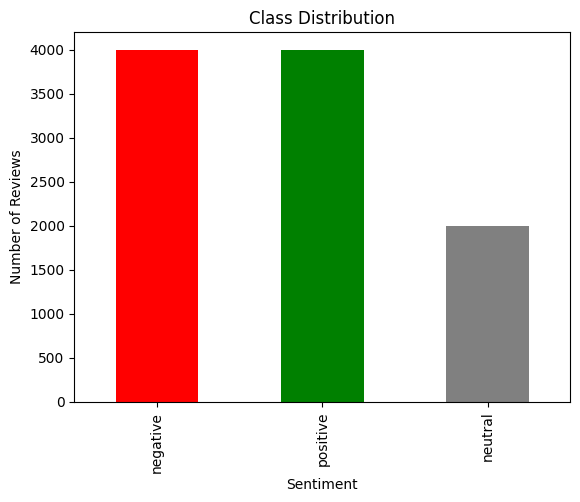

In [12]:
df["sentiment"].value_counts().plot(kind="bar", title="Class Distribution", color=["red", "green", "gray"])
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## Clean Review Text

We define a function to clean the text.
This includes:
- Lowercasing
- Stripping whitespace
- ...

Since we will use transformers library and a bert model, we will keep this function minimal. We could have done more but it was unnecessary, unless we were to use other traditional models.

In [15]:
def clean_text(text):

    text = text.strip()
    text = re.sub(r"\s+", " ", text)
    return text

# Apply cleaning function
df["text_clean"] = df["text"].apply(clean_text)

df[["text", "text_clean"]].head()

,text,text_clean
0,It is definitely not a watercolor book. The p...,It is definitely not a watercolor book. The pa...
1,Missing the sketch pad. Even worse I realized ...,Missing the sketch pad. Even worse I realized ...
2,Every page has a crease running the entire len...,Every page has a crease running the entire len...
3,Only read and believe things you want to see c...,Only read and believe things you want to see c...
4,My little one just likes doctors so I thought ...,My little one just likes doctors so I thought ...


## Save The Clean Data

In [17]:
# Save cleaned dataset
df[["text_clean", "sentiment"]].to_csv("../data/processed_reviews.csv", index=False)